<a href="https://colab.research.google.com/github/lstival/mo826/blob/main/P3/P3_MO826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importações padrões para manipulação de vetores e matrizes
import numpy as np
import pandas as pd

#Biblioteca para visualizar gráficos
import matplotlib.pyplot as plt

#Bibliotecas para manipulação de grafos
import networkx as nx
from networkx.algorithms import bipartite

#Biblioteca para contar valores
import collections

## Nature of Complex Network of Dengue Epidemic as a Scale-Free Network

Base de dados disponível no Apendix 1: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6689515/pdf/hir-25-182.pdf

Descrição de como realizar as métricas do estudo: https://reader.elsevier.com/reader/sd/pii/S0307904X16305753?token=97A47231071F24D5A004E0FACE248F8B07A8F980C680F149C5A49B96FA19459F984BC5BC4AB0CB8F951D3451ACFF60BA&originRegion=us-east-1&originCreation=20220527171314

In [2]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6689515/

#Explica melhor
#https://reader.elsevier.com/reader/sd/pii/S0307904X16305753?token=97A47231071F24D5A004E0FACE248F8B07A8F980C680F149C5A49B96FA19459F984BC5BC4AB0CB8F951D3451ACFF60BA&originRegion=us-east-1&originCreation=20220527171314

In [3]:
#O vértice HLL100 está duplicado e foi removido dos dados originais.

In [4]:
#Lista das prefixos de cada região (Ulitizado para plotagem)
prefix_location = ['GL', 'PL', 'HL']

In [5]:
# Vertices representando as localidades.
regios_nodes = ['GL18', 'GL27', 'HLL13', 'HLL36', 'HLL168', 'GL5', 'GL57', 'HLL63', 'HLL88', 'HLL52', 'GL1', 'GL28', 'HLL89', 'HLL18', 'HLL103', 'GL15', 'GL23', 'HLL129', 'HLL73', 'HLL148', 'GL39', 'GL21', 'HLL82', 'HLL141', 'HLL16', 'GL49', 'GL11', 'HLL139', 'HLL43', 'HLL28', 'GL34', 'GL19', 'HLL174', 'HLL142', 'HLL116', 'GL56', 'GL16', 'HLL34', 'HLL91', 'HLL132', 'GL40', 'GL52', 'HLL12', 'HLL97', 'HLL149', 'GL43', 'GL37', 'HLL75', 'HLL101', 'HLL167', 'GL24', 'GL10', 'HLL77', 'HLL45', 'HLL35', 'GL50', 'GL9', 'HLL152', 'HLL134', 'HLL110', 'GL13', 'GL53', 'HLL164', 'HLL138', 'HLL156', 'GL17', 'GL29', 'HLL166', 'HLL108', 'HLL172', 'GL12', 'GL2', 'HLL24', 'HLL115', 'HLL56', 'GL25', 'HLL130', 'HLL165', 'HLL21', 'HLL61', 'GL14', 'HLL64', 'HLL182', 'HLL31', 'HLL69', 'GL38', 'HLL84', 'HLL185', 'HLL68', 'HLL79', 'GL47', 'HLL117', 'HLL143', 'HLL74', 'HLL157', 'GL8', 'HLL161', 'HLL146', 'HLL114', 'HLL40', 'GL51', 'HLL46', 'HLL9', 'HLL136', 'HLL54', 'GL36', 'HLL60', 'HLL170', 'HLL17', 'HLL83', 'GL42', 'HLL87', 'HLL11', 'HLL29', 'HLL171', 'GL54', 'HLL44', 'HLL2', 'HLL41', 'HLL178', 'GL26', 'HLL184', 'HLL86', 'HLL55', 'HLL8', 'GL6', 'HLL15', 'HLL90', 'HLL153', 'HLL20', 'GL4', 'HLL85', 'HLL50', 'HLL98', 'HLL48', 'GL22', 'HLL158', 'HLL123', 'HLL1', 'HLL53', 'GL48', 'HLL65', 'HLL137', 'HLL113', 'HLL80', 'GL41', 'HLL120', 'HLL39', 'HLL121', 'HLL94', 'GL45', 'HLL72', 'HLL70', 'HLL133', 'HLL106', 'GL44', 'HLL151', 'HLL67', 'HLL147', 'HLL118', 'GL30', 'HLL183', 'HLL26', 'HLL154', 'HLL131', 'GL3', 'HLL127', 'HLL38', 'HLL181', 'HLL4', 'GL7', 'HLL59', 'HLL135', 'HLL105', 'HLL47', 'GL58', 'HLL145', 'HLL180', 'HLL144', 'HLL58', 'GL20', 'HLL150', 'HLL19', 'HLL7', 'HLL92', 'GL35', 'HLL14', 'HLL42', 'HLL30', 'HLL93', 'GL32', 'HLL175', 'HLL96', 'HLL51', 'HLL99', 'GL31', 'HLL76', 'HLL112', 'HLL57', 'HLL162', 'GL55', 'HLL25', 'HLL104', 'HLL78', 'HLL169', 'GL46', 'HLL10', 'HLL37', 'HLL126', 'HLL179', 'GL33', 'HLL49', 'HLL163', 'HLL159', 'HLL3', 'HLL5', 'PL158', 'PL208', 'PL10', 'PL49', 'HLL22', 'PL59', 'PL224', 'PL226', 'PL93', 'HLL23', 'PL26', 'PL68', 'PL40', 'PL129', 'HLL27', 'PL171', 'PL111', 'PL166', 'PL144', 'HLL66', 'PL174', 'PL95', 'PL75', 'PL113', 'HLL102', 'PL131', 'PL206', 'PL105', 'PL157', 'HLL107', 'PL79', 'PL3', 'PL27', 'PL183', 'HLL111', 'PL175', 'PL169', 'PL48', 'PL191', 'HLL119', 'PL179', 'PL53', 'PL112', 'PL214', 'HLL173', 'PL69', 'PL57', 'PL156', 'PL227', 'HLL33', 'PL18', 'PL145', 'PL73', 'PL12', 'HLL81', 'PL65', 'PL228', 'PL223', 'PL58', 'HLL100', 'PL87', 'PL118', 'PL6', 'PL155', 'HLL100', 'PL87', 'PL118', 'PL6', 'PL155', 'HLL124', 'PL178', 'PL89', 'PL25', 'PL187', 'HLL125', 'PL44', 'PL130', 'PL72', 'PL15', 'HLL128', 'PL82', 'PL115', 'PL20', 'PL241', 'HLL160', 'PL172', 'PL201', 'PL78', 'PL39', 'HLL176', 'PL193', 'PL203', 'PL81', 'PL164', 'HLL6', 'PL124', 'PL94', 'PL84', 'PL225', 'HLL32', 'PL1', 'PL121', 'PL108', 'PL123', 'HLL62', 'PL80', 'PL125', 'PL149', 'PL236', 'HLL71', 'PL139', 'PL135', 'PL163', 'PL41', 'HLL95', 'PL182', 'PL148', 'PL219', 'PL19', 'HLL109', 'PL66', 'PL216', 'PL220', 'PL192', 'HLL122', 'PL98', 'PL217', 'PL230', 'PL34', 'HLL140', 'PL46', 'PL212', 'PL9', 'PL7', 'HLL155', 'PL238', 'PL64', 'PL119', 'PL61', 'HLL177', 'PL51', 'PL211', 'PL143', 'PL85', 'PL126', 'PL186', 'PL2', 'PL159', 'PL207', 'PL31', 'PL52', 'PL104', 'PL160', 'PL154', 'PL134', 'PL184', 'PL215', 'PL177', 'PL162', 'PL127', 'PL204', 'PL234', 'PL188', 'PL197', 'PL137', 'PL63', 'PL237', 'PL198', 'PL202', 'PL54', 'PL106', 'PL43', 'PL213', 'PL209', 'PL128', 'PL222', 'PL47', 'PL218', 'PL8', 'PL200', 'PL50', 'PL55', 'PL239', 'PL42', 'PL114', 'PL185', 'PL221', 'PL242', 'PL150', 'PL138', 'PL102', 'PL232', 'PL29', 'PL161', 'PL33', 'PL152', 'PL233', 'PL30', 'PL190', 'PL17', 'PL100', 'PL122', 'PL35', 'PL195', 'PL173', 'PL99', 'PL146', 'PL56', 'PL210', 'PL132', 'PL14', 'PL77', 'PL62', 'PL133', 'PL32', 'PL110', 'PL71', 'PL147', 'PL91', 'PL153', 'PL86', 'PL141', 'PL97', 'PL194', 'PL90', 'PL189', 'PL5', 'PL235', 'PL116', 'PL196', 'PL67', 'PL21', 'PL117', 'PL22', 'PL120', 'PL38', 'PL142', 'PL23', 'PL229', 'PL70', 'PL168', 'PL136', 'PL167', 'PL83', 'PL205', 'PL92', 'PL37', 'PL103', 'PL231', 'PL4', 'PL74', 'PL151', 'PL24']

In [6]:
# Numero de casos de cada região.
cases_nodes = [128, 8, 76, 28, 14, 111, 7, 74, 28, 13, 105, 7, 73, 27, 13, 85, 7, 71, 27, 13, 80, 7, 70, 27, 12, 79, 7, 70, 26, 12, 55, 6, 66, 25, 12, 53, 6, 60, 24, 12, 43, 5, 59, 24, 12, 41, 5, 54, 23, 12, 41, 5, 54, 22, 11, 40, 4, 53, 22, 11, 38, 4, 52, 21, 11, 35, 4, 52, 20, 11, 32, 4, 51, 20, 10, 31, 729, 51, 19, 10, 29, 435, 51, 19, 10, 27, 317, 50, 19, 10, 26, 251, 48, 19, 10, 23, 250, 46, 19, 9, 23, 237, 45, 19, 9, 23, 231, 45, 18, 9, 21, 228, 44, 18, 9, 16, 217, 43, 18, 9, 15, 194, 43, 18, 8, 14, 183, 42, 18, 8, 14, 179, 41, 17, 8, 14, 159, 41, 16, 8, 13, 149, 40, 16, 8, 13, 141, 39, 16, 8, 12, 122, 39, 16, 8, 12, 116, 38, 16, 8, 12, 113, 36, 16, 8, 12, 110, 36, 16, 7, 11, 103, 35, 15, 7, 11, 96, 34, 15, 7, 11, 96, 31, 14, 7, 10, 95, 31, 14, 7, 9, 95, 31, 14, 7, 9, 90, 31, 14, 7, 8, 83, 30, 14, 7, 8, 81, 29, 14, 7, 8, 79, 29, 14, 6, 6, 237, 65, 27, 13, 6, 227, 65, 27, 13, 6, 223, 63, 26, 13, 6, 206, 63, 26, 13, 6, 192, 61, 24, 12, 6, 181, 59, 24, 12, 6, 170, 55, 23, 12, 6, 166, 55, 23, 12, 6, 153, 49, 23, 12, 6, 150, 47, 23, 12, 5, 145, 46, 22, 11, 5, 136, 45, 22, 11, 5, 136, 44, 21, 11, 5, 136, 44, 21, 11, 5, 135, 43, 21, 11, 5, 130, 43, 21, 10, 5, 90, 20, 8, 5, 5, 89, 20, 8, 4, 5, 85, 20, 8, 103, 4, 83, 19, 8, 102, 4, 82, 19, 8, 100, 4, 82, 19, 8, 100, 4, 80, 19, 8, 98, 4, 79, 19, 8, 95, 4, 73, 19, 8, 30, 4, 72, 19, 8, 29, 4, 70, 18, 7, 28, 4, 70, 17, 7, 28, 4, 65, 17, 7, 21, 3107, 43, 16, 7, 21, 2826, 42, 16, 7, 9, 1174, 42, 16, 7, 9, 1022, 42, 16, 7, 9, 720, 41, 16, 7, 9, 548, 41, 15, 7, 9, 488, 40, 15, 7, 8, 434, 39, 15, 7, 5, 393, 39, 15, 7, 5, 345, 37, 15, 6, 5, 327, 37, 15, 6, 5, 298, 35, 14, 6, 5, 287, 34, 14, 6, 5, 282, 33, 10, 6, 275, 33, 10, 6, 114, 33, 10, 6, 113, 33, 10, 6, 113, 32, 10, 6, 110, 32, 9, 6, 109, 32, 9, 6, 109, 32, 9, 6, 109, 31, 9, 6, 107, 30, 9, 6, 104, 30, 9, 5]

In [7]:
# Dataframe contendo as arestas do grafo.
df = pd.DataFrame()
df['location'] = regios_nodes
df['cases'] = cases_nodes
df['weight'] = cases_nodes

# Removendo localidade repetidas (provavel sujeira dos dados)
df.drop_duplicates(subset='location', keep="first", inplace=True)

df.head()

,location,cases,weight
0,GL18,128,128
1,GL27,8,8
2,HLL13,76,76
3,HLL36,28,28
4,HLL168,14,14


## Criando Grafo Bipartido

In [8]:
#Criando o grafo.
B = nx.Graph()

In [9]:
#Criando as opções bipartidas (0 para regiões e 1 para quantidade de casos).
B.add_nodes_from(regios_nodes, bipartite=0)
B.add_nodes_from(cases_nodes, bipartite=1)

In [10]:
edge_with_weight = []
for edge in df.values:
  edge_with_weight.append(tuple(edge))

In [11]:
#Inserindo as arestas no grafo.
B.add_weighted_edges_from(edge_with_weight)

In [12]:
#Verificando se o grafo é conexo, como o resultado é false
#isso indica que existem partes da rede que não estão
#conectadas com as demais
# nx.is_connected(B)
B_directed = B.to_directed()

## Projeções do Grafo Bipartido

In [13]:
#Represetação G1 será o grafo contendo as regiões.
G1 = bipartite.projected_graph(B_directed, regios_nodes)

print(f"O Grafo das regiões possui {G1.number_of_edges()} arestas e {G1.number_of_nodes()} vértices")

O Grafo das regiões possui 4376 arestas e 464 vértices


In [14]:
#Represetação G2 será o grafo contendo a quantidade de casos.
G2 = bipartite.projected_graph(B_directed, cases_nodes)

print(f"O Grafo das quantidades possui {G2.number_of_edges()} arestas e {G2.number_of_nodes()} vértices")

O Grafo das quantidades possui 0 arestas e 132 vértices


## Projeções propostas

In [15]:
def set_edges_weights(G, node):
  """
  G: Grafo onde o vértice e seus vizinhos estão presentes.
  node: Vértice que será o peso alterado junto a seus vizinhos.

  Atualiza o peso da aresta considerando o 'weight' do vértice
  de origem.
  """
  for neig in G.neighbors(node):
    G.edges[node, neig]['weight'] = G.nodes[node]['weight']

### Distribuição Binária

Projeção direta de conectividade, onde os pesos são sempre 1 e os valores 
consideram somente a quantidade de ligações que insidem no vértice.
$$ W_{ij} = \sum_{p} 1$$

Onde $W_{ij}$ representa os valores da matriz de adejacência entre $i$ e $j$, $p$ são todos os vértices e $1$ é o valor definido como peso.

In [16]:
#Cria uma represebtação direcionada da projeção das regiões do grafo.
G1_binary = G1.to_directed()

In [17]:
#Definindo os pesos para cada vértice.
for node in G1_binary.nodes():
  G1_binary.nodes[node]['weight'] = 1

In [18]:
#Definindo o peso para cada aresta.
for node in G1_binary.nodes():
  set_edges_weights(G1_binary, node)

### Distribuição por soma

Projeção direta de conectividade, onde os pesos são representados
pela quantidade de casos de dengue na região, assim a "força do vértice"
é medida conforme o total de casos das reigões que são suas "vizinhas"
na rede.

$$ W_{ij} = \sum_{p} W_{i},p$$

Onde a soma realizada e representanda em $W_{ij}$ é do peso do vértice $i$ que inside em $j$.

In [19]:
#Cria uma represebtação direcionada da projeção das regiões do grafo.
G1_sum= G1.to_directed()

In [20]:
#Definindo os pesos para cada vértice
for node in G1_sum.nodes():
  G1_sum.nodes[node]['weight'] = df.set_index('location').loc[node]['weight']

In [21]:
#Definindo o peso para cada aresta.
for node in G1_sum.nodes():
  set_edges_weights(G1_sum, node)

### Distribuição NewMan

Projeção funciona parecida com a escala de soma, porém
normalizado os valores.

$$ W_{ij} = \sum_{p} \frac{W_{ip}}{N_{p}-1}$$

Onde $W_{ij}$ representa o peso entre $i$ e $j$, $W_{ip}$ é o peso da conexão entre $i$ e seus vizinhos e, $N_{p}$ é o total de "autores" em um "paper" $p$ (nesse caso seria quantidade de vizinhos na rede).

In [22]:
#Cria uma represebtação direcionada da projeção das regiões do grafo.
G1_newman= G1.to_directed()

In [23]:
def newMan_node_weight(G, node):
    """
    G: Grafo onde o vértice e seus vizinhos estão presentes.
    node: Vértice que será o peso alterado.

    Atualiza o peso do vértice considerando a fórmula de New Man.
    """
    #Quantidade de vertices presentes na rede
    G1_newman_number_nodes = G.number_of_nodes()

    #   for node in G.nodes():
    #Peso do vértice
    node_weight = df.set_index('location').loc[node]['weight']
    #Quantidade de viznhos do vértice
    neigbs = len(list(G.neighbors(node)))
    #Define o peso conforme a função de NewMan
    newMan_weights = (node_weight * neigbs)/(G1_newman_number_nodes-1)
    #Insere o valor no vértice
    G.nodes[node]['weight'] = newMan_weights

In [24]:
for node in G1_newman.nodes():
  newMan_node_weight(G1_newman, node)

In [25]:
#Definindo o peso para cada aresta.
for node in G1_newman.nodes():
  set_edges_weights(G1_newman, node)

In [26]:
list_of_graphs = [G1_binary, G1_sum, G1_newman]

## Medidas de força dos vértices
A mais basica medida é a Centralidade de Freeman's que é definida no artigo como:
$$ C_{D} = deg_{k} = \sum_{j}^{N} m_{kj}$$

Onde $k$ é o vértice principal, $j$ representa todos os outros vértices,
$m$ é a matriz de adjacência e $m_{jk}$ representa a conectividade e $N$ o total de vértices na rede.

In [27]:
def get_node_streng(G, node):
  """
  G: Grafo contendo o vértice (node) e os vizinhos.
  node: Vértice que tera a sua força medida.

  Intera entre todos os vizinhos do vértice 'node' e retorna a soma cumulativa
  do peso de todas as arestas entre 'node' e seus vizinhos.
  """
  total_streng = 0
  for neig in G.neighbors(node):
    total_streng += G.edges[node, neig]['weight']

  return total_streng

In [28]:
#Calculando a força de cada nó para a projeção binária.
for node in G1_binary.nodes():
  G1_binary.nodes[node]['strength'] = get_node_streng(G1_binary, node)

#Exemplo da construção de um vértice
G1_binary.nodes[node]

{'bipartite': 0, 'strength': 18, 'weight': 1}

In [29]:
#Calculando a força de cada nó para a projeção binária.
for node in G1_sum.nodes():
  G1_sum.nodes[node]['strength'] = get_node_streng(G1_sum, node)

#Exemplo da construção de um vértice
G1_sum.nodes[node]

{'bipartite': 0, 'strength': 90, 'weight': 5}

In [30]:
#Calculando a força de cada nó para a projeção binária.
for node in G1_newman.nodes():
  G1_newman.nodes[node]['strength'] = get_node_streng(G1_newman, node)

#Exemplo da construção de um vértice
G1_newman.nodes[node]

{'bipartite': 0, 'strength': 3.4989200863930887, 'weight': 0.19438444924406048}

## Plot dos pesos das vértices

Gera os gráficos apresentados no artigo original, os valores não são apresentados da mesma forma, pois, os valores da rede fornecida pelos autores
não é exatamente igual ao utilizado para gerar os exemplos apresentados.

Foi gerado uma linha horizontal vermelah delimitando 80\% dos valores, para facilitar a identificação dos vértices de maior força (possibilitando a comparação com o artigo original).

In [31]:
def get_strength(G, prefix_idx):
    plot_weights = []
    for node in G.nodes():
        streng = G.nodes[node]['strength']
        plot_weights.append(streng)

    df_results = pd.DataFrame()

    df_results['location'] = list(G.nodes())
    df_results['strength'] = plot_weights
    
    df_prefix_plot = df_results[df_results['location'].str.contains(prefix_location[prefix_idx])]

    return df_prefix_plot

In [32]:
def plot_stregth(G, prefix_idx):
    df_prefix_plot = get_strength(G, prefix_idx)

    y_hline = round(max(df_prefix_plot['strength'].values) * 0.8)

    fig, ax1 = plt.subplots(figsize=(25, 5))
    ax1.bar(df_prefix_plot['location'].values, df_prefix_plot['strength'].values)
    ax1.axhline(y=y_hline, color='r', linestyle='-')
    ax1.set_xticklabels(df_prefix_plot['location'].values, rotation=45)
    ax1.tick_params(axis="both", direction="in", pad=15)
    ax1.set_xlabel('Grupos de casos')
    ax1.set_ylabel('Força dos vértices')

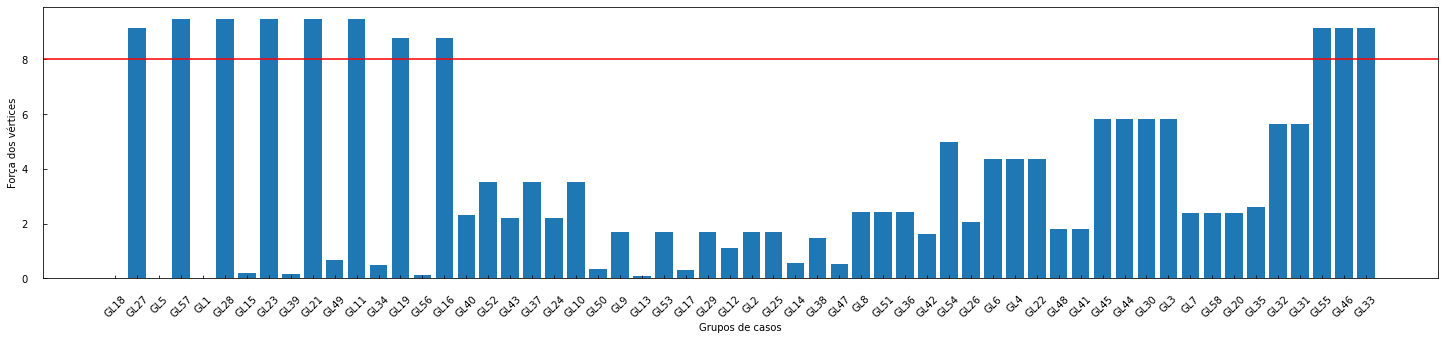

In [33]:
plot_stregth(G1_newman, 0)

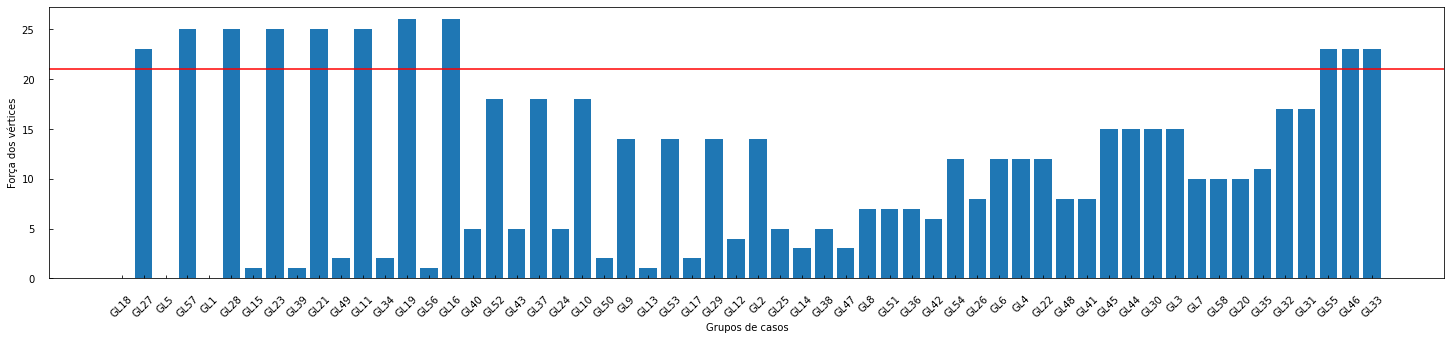

In [34]:
plot_stregth(G1_binary, 0)

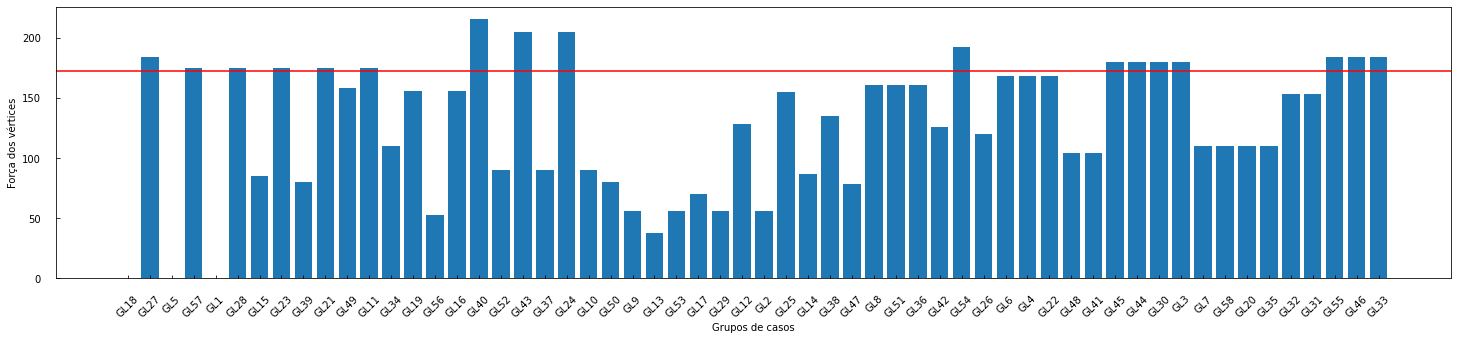

In [35]:
plot_stregth(G1_sum, 0)

## Centralidade das redes

O estudo apresenta a centralidade por intermediação e proximidade para o conjunto das redes.

In [36]:
G3 = list_of_graphs[0].copy()

In [37]:
GL_nodes = df[df['location'].str.contains(prefix_location[0])]['location'].values

In [38]:
GL_subgraph = G3.subgraph(GL_nodes)

In [39]:
nx.write_gexf(GL_subgraph, "test.gexf")

## Representação da rede GL
Utilizado a ferramente Gephi para gerar a representação abaixo, onde o tamanho e a tonalidade dos vértices correspondem a sua força medida através do método da soma.

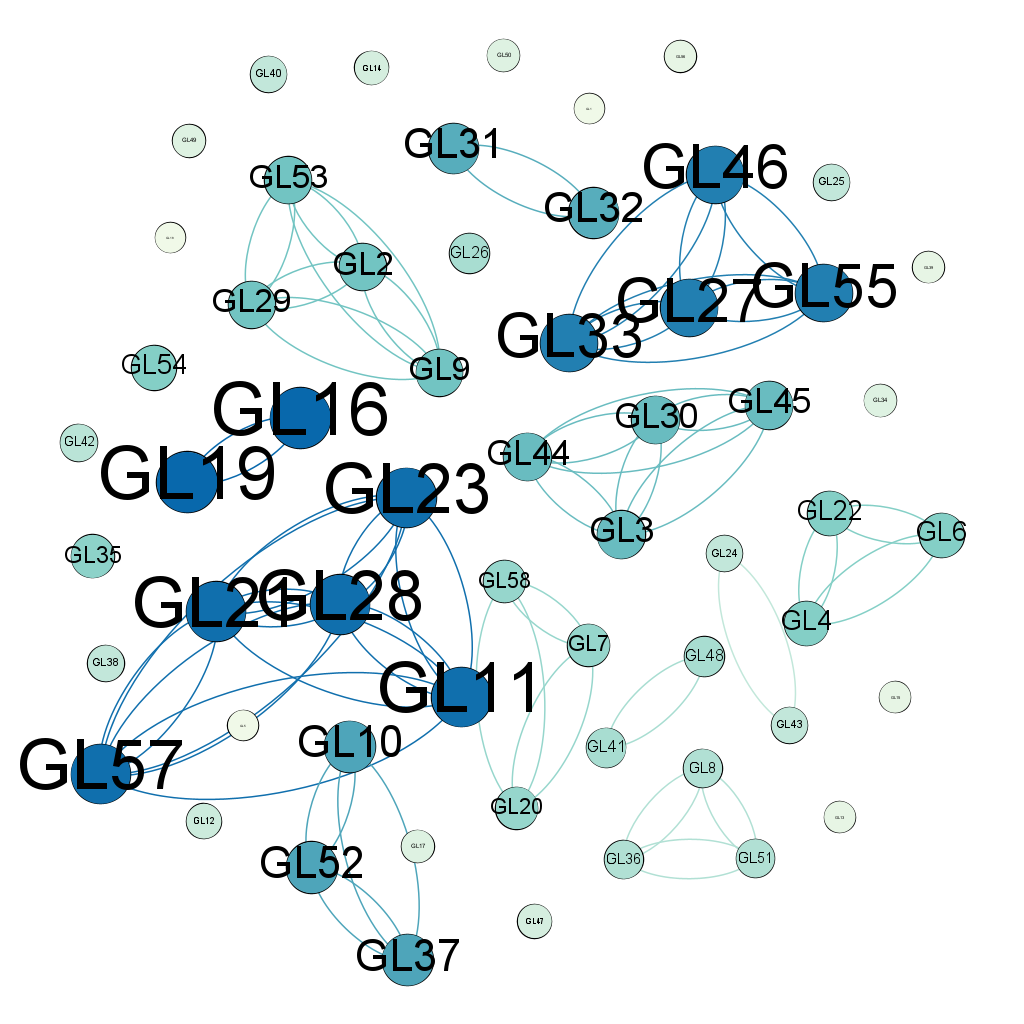

## Power Law

O Primeiro artigo apresenta uma representação dos valores da *powerlaw* da distribuição da força dos vértices.

A representação não corresponde aos valores apresentados pelo artigo original, essa diferente é devido a distribuição da rede exemplificada e os valores presentes na base posuirem a mesma estrtura, porém, com valores diferentes.

In [40]:
#testar se a rede segue a power law
#hw7
gamma = -2.1

In [41]:
GL_powerLaw = G1.copy()
GL_powerLaw_sub = GL_powerLaw.subgraph(GL_nodes)

In [42]:
degs = [GL_powerLaw_sub.degree(n) for n in GL_powerLaw_sub.nodes()] # Find the degree of nodes
dict_deg_distribution = collections.Counter(degs) # Count how many times each degree apears

list_uniq_degrees = np.unique(degs) # List with unique degree

In [43]:
list_prob_degree = [] # List with probability of each degree

In [44]:
for deg_random_dist in dict_deg_distribution: # Loop to get the degree distributionm
    list_prob_degree.append(dict_deg_distribution[deg_random_dist]/len(degs))

In [45]:
# Find the max degree in the network
max_degree = max(sorted([d for n, d in G1.degree()], reverse=True))

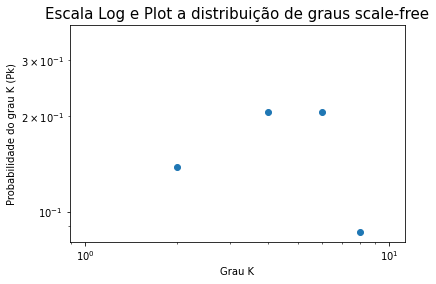

In [50]:
plt.scatter((list(dict_deg_distribution.keys())),
            (list_prob_degree))

plt.title('Escala Log e Plot a distribuição de graus scale-free', size=15)

plt.xlabel("Grau K")
plt.ylabel('Probabilidade do grau K (Pk)')
plt.yscale("log")
plt.xscale("log")

In [47]:
np.log([k ** gamma for k in list_prob_degree])

array([2.1334332 , 3.30862636, 4.16010308, 5.14711071, 3.30862636])